In [6]:
import test_utils.image as image
import data.util as data_util
import pillow_heif
import matplotlib.pyplot as plt
import numpy as np

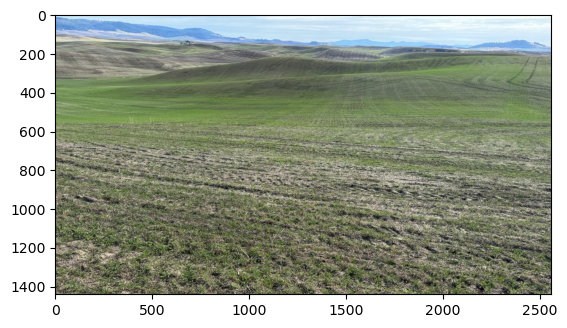

In [7]:
original_image_path = '/data0/yuang/guided_sr/codes/dataset/Farm/HR/Farm_image_2.png'
img = data_util.read_img(None,original_image_path,None)[:,:,[2,1,0]]
plt.imshow(img)

In [23]:
# scenario 1: we already know some parts of the image can be compressed more than others
# we can use the following code to compress the image with different scales

LQ_area = img[0:150,:,:]
HQ_area = img[150:,:,:]
#plt.imshow(LQ_area)
# compresisng
LQ_compressed = image.downscale(image=LQ_area, factor=8,from_dir=False)
HQ_compressed = image.downscale(image=HQ_area, factor=4,from_dir=False)

creating model... export CUDA_VISIBLE_DEVICES=0
done in 234.145ms
transforming image... done in 234.774ms
downscaling image... Done in 48.486ms
creating model... export CUDA_VISIBLE_DEVICES=0
done in 75.287ms
transforming image... done in 82.795ms
downscaling image... Done in 334.411ms


In [25]:
image.save_image(LQ_compressed,'./compressed_farm2_LQ.png')
image.save_image(HQ_compressed,'./compressed_farm2_HQ.png')

In [17]:
LQ_compressed = LQ_compressed.astype(np.float32) / 255.
HQ_compressed = HQ_compressed.astype(np.float32) / 255.

In [18]:
# reconstructing
LQ_reconstructed = image.upscale(image=LQ_compressed, factor=8,from_dir=False)
HQ_reconstructed = image.upscale(image=HQ_compressed, factor=4,from_dir=False)

reconstructed_image = np.concatenate((LQ_reconstructed,HQ_reconstructed),axis=0)

creating model... export CUDA_VISIBLE_DEVICES=0
done in 193.572ms
transforming image... done in 193.698ms
upscaling image... Done in 57.503ms
creating model... export CUDA_VISIBLE_DEVICES=0
done in 75.353ms
transforming image... done in 75.766ms
upscaling image... Done in 410.249ms


In [22]:
image.save_image(reconstructed_image[:,:,[2,1,0]],'./split_compressed_farm2.png')